<a href="https://colab.research.google.com/github/KUMARPALAKOLLU/socialNetworkAnalysis/blob/main/socialNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 1**

In [1]:
# !pip install networkx
import pandas as pd
import numpy as np  
import networkx as nx
from matplotlib import pyplot as plt

**QUESTION 1**

1.1 load the data and plot undirected graph and save as png file

1.2 load the data and plot directed graph and save as png file

1.3 Get Adjacency Matrix for the undirected graph

1.4 Get Adjacency Matrix for the directed graph 

In [7]:
# Function to print the Graph
def printGraph(G):
  pos=nx.spring_layout(G,k=0.3, iterations=50) #Getting Positions to plot the graph
  nx.draw(G,pos,with_labels=True)
  nx.draw_networkx_edge_labels(G, pos,edge_labels=nx.get_edge_attributes(G, 'weight'),font_color='red')
  fig = plt.gcf()
  fig.set_size_inches(6,6)
  if G.is_directed():
    plt.savefig('/content/drive/MyDrive/Colab Notebooks/directed_graph.png')
  else:
    plt.savefig('/content/drive/MyDrive/Colab Notebooks/undirected_graph.png')
  plt.show()

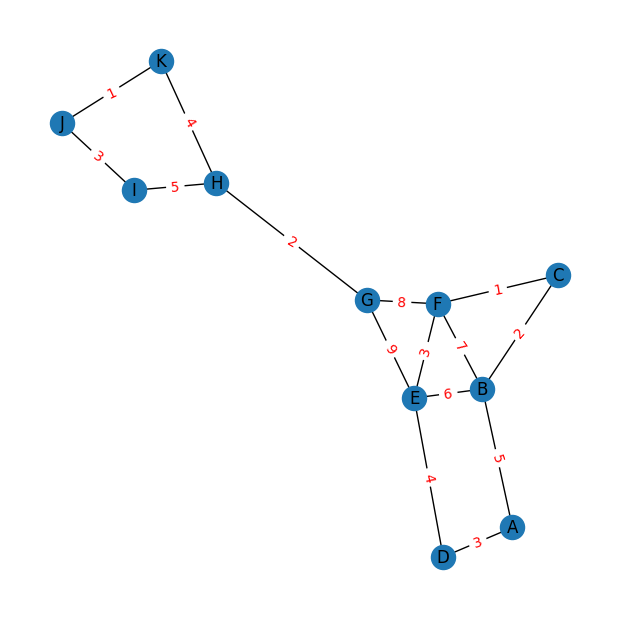

In [8]:
'''Question 1.1'''

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/edge_list.csv') # Loading CSV data into pandas DataFrame

UndirectedGraph = nx.Graph()  # Creating a graph using networkx

# Adding edges to the graph
for index, row in data.iterrows():
    UndirectedGraph.add_edge(row['Source'], row['Destination'], weight=row['Weight'])

printGraph(UndirectedGraph)


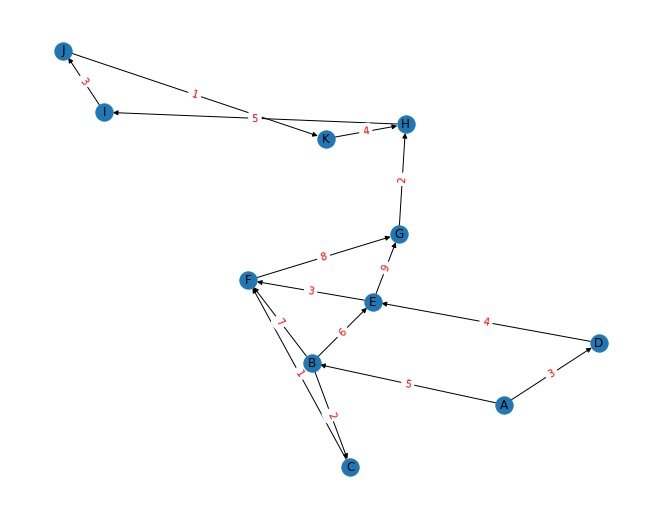

In [ ]:
'''Question 1.2'''
 
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/edge_list.csv') # Loading CSV data into pandas DataFrame

DirectedGraph= nx.DiGraph()  # Creating a graph using networkx

# Adding edges to the graph
for index, row in data.iterrows():
    DirectedGraph.add_edge(row['Source'], row['Destination'], weight=row['Weight'])

printGraph(DirectedGraph)


In [ ]:
'''Question 1.3'''

undirectedAdjacency=nx.to_numpy_array(UndirectedGraph)
print(undirectedAdjacency)

[[0. 5. 3. 0. 0. 0. 0. 0. 0. 0. 0.]
 [5. 0. 0. 2. 6. 7. 0. 0. 0. 0. 0.]
 [3. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 6. 4. 0. 0. 3. 9. 0. 0. 0. 0.]
 [0. 7. 0. 1. 3. 0. 8. 0. 0. 0. 0.]
 [0. 0. 0. 0. 9. 8. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0. 5. 0. 4.]
 [0. 0. 0. 0. 0. 0. 0. 5. 0. 3. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 4. 0. 1. 0.]]


In [ ]:
'''Question 1.4'''

directedAdjacency=nx.to_numpy_array(DirectedGraph)
print(directedAdjacency)

[[0. 5. 3. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 6. 7. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 3. 9. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 8. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0.]]


**QUESTION 2**

2.1 For Undirected Graph

2.1.1 No of Nodes

2.1.2 No of Edges

2.1.3 Nodes with Max Degree

2.1.4 Nodes with Min Degree


In [ ]:
'''Question 2.1'''

undirectedNodes=list(UndirectedGraph.nodes()) #Storing List of Nodes
undirectedEdges=list(UndirectedGraph.edges()) #Storing List of Edges

# Printing No of Nodes and Edges
print(f'Number of Nodes: {len(undirectedNodes)}')
print(f'Number of Edges: {len(undirectedEdges)}')

# Compute degree distribution
degrees = dict(UndirectedGraph.degree())
maxDegree= max(degrees.values())
minDegree= min(degrees.values())
print(f'Nodes with max degree: {maxDegree}, degree={[k for k, v in degrees.items() if v == maxDegree]}')
print(f'Nodes with min degree: {minDegree}, degree={[k for k, v in degrees.items() if v == minDegree]}')


Number of Nodes: 11
Number of Edges: 15
Nodes with max degree: 4, degree=['B', 'E', 'F']
Nodes with min degree: 2, degree=['A', 'D', 'C', 'I', 'J', 'K']


2.2 For Directed Graph

2.2.1 No of Nodes

2.2.2 No of Edges

2.2.3 Node with Max and Min Out Degree

2.2.4 Node with Max and Min In Degree

In [ ]:
'''Question 2.2'''

directedNodes=list(DirectedGraph.nodes()) #Storing List of Nodes
directedEdges=list(DirectedGraph.edges()) #Storing List of Edges

inDegree = [degree for node,degree in DirectedGraph.in_degree()]
outDegree = [degree for node,degree in DirectedGraph.out_degree()]

inDegree.sort(key = lambda x:-x) 
outDegree.sort(key = lambda x:-x)

maxInDegree,minInDegree = inDegree[0],inDegree[-1]
maxOutDegree,minOutDegree = outDegree[0],outDegree[-1]

# No of Nodes and Edges
print(f'Number of Nodes: {len(directedNodes)}')
print(f'Number of Edges: {len(directedEdges)}')

# Node with the maximum in-degree
print(f"Nodes with maximum in-degree of {maxInDegree} are {[node for node,degree in DirectedGraph.in_degree() if degree == maxInDegree]}")

# Node with the minimum in-degree
print(f"Nodes with minimum in-degree of {minInDegree} are {[node for node,degree in DirectedGraph.in_degree() if degree == minInDegree]}")

# Node with the maximum out-degree
print(f"Nodes with maximum out-degree of {maxOutDegree} are {[node for node,degree in DirectedGraph.out_degree() if degree == maxOutDegree]}")

# Node with the minimum out-degree
print(f"Nodes with minimum out-degree of {minOutDegree} are {[node for node,degree in DirectedGraph.out_degree() if degree == minOutDegree]}")

Number of Nodes: 11
Number of Edges: 15
Nodes with maximum in-degree of 3 are ['F']
Nodes with minimum in-degree of 0 are ['A']
Nodes with maximum out-degree of 3 are ['B']
Nodes with minimum out-degree of 1 are ['D', 'C', 'F', 'G', 'H', 'I', 'J', 'K']


**Question 3**

3.1 sum of weights of all outgoing edges for each vertex (for UndirectedGraph)

3.2 sum of weights of all incoming and outgoing edges for each vertex (for DirectedGraph)

In [ ]:
'''Question 3.1'''

outgoing_weights = {}
for node in UndirectedGraph.nodes():
    outgoing_weights[node] = sum([edge[2]['weight'] for edge in UndirectedGraph.edges(node, data=True)])
    print(f"Sum of weights of edges connected to Node {node} = {round(outgoing_weights[node], 2)}")

Sum of weights of edges connected to Node A = 8
Sum of weights of edges connected to Node B = 20
Sum of weights of edges connected to Node D = 7
Sum of weights of edges connected to Node C = 3
Sum of weights of edges connected to Node E = 22
Sum of weights of edges connected to Node F = 19
Sum of weights of edges connected to Node G = 19
Sum of weights of edges connected to Node H = 11
Sum of weights of edges connected to Node I = 8
Sum of weights of edges connected to Node J = 4
Sum of weights of edges connected to Node K = 5


In [ ]:
'''Question 3.2'''

outgoing_weights = {}
incoming_weights = {}
for node in DirectedGraph.nodes():
    outgoing_weights[node] = sum([edge[2]['weight'] for edge in DirectedGraph.out_edges(node, data=True)])
    incoming_weights[node] = sum([edge[2]['weight'] for edge in DirectedGraph.in_edges(node, data=True)])

# Printing the sum of weights of incoming and outgoing edges for each vertex
for node in DirectedGraph.nodes():
    print(f"Sum of weights of outgoing edges and incoming edges of Node {node} = {round(incoming_weights[node]+outgoing_weights[node], 2)}")



Sum of weights of outgoing edges and incoming edges of Node A = 8
Sum of weights of outgoing edges and incoming edges of Node B = 20
Sum of weights of outgoing edges and incoming edges of Node D = 7
Sum of weights of outgoing edges and incoming edges of Node C = 3
Sum of weights of outgoing edges and incoming edges of Node E = 22
Sum of weights of outgoing edges and incoming edges of Node F = 19
Sum of weights of outgoing edges and incoming edges of Node G = 19
Sum of weights of outgoing edges and incoming edges of Node H = 11
Sum of weights of outgoing edges and incoming edges of Node I = 8
Sum of weights of outgoing edges and incoming edges of Node J = 4
Sum of weights of outgoing edges and incoming edges of Node K = 5


**Question 4**

4.1 All Centralities for undirected graph

4.2 All Centralities for directed graph

In [ ]:
'''Question 4.1'''

# Degree Centrality
degreeCentrality = nx.degree_centrality(UndirectedGraph)

# Betweenness Centrality
betweennessCentrality = nx.betweenness_centrality(UndirectedGraph)

# Closeness Centrality
closenessCentrality = nx.closeness_centrality(UndirectedGraph)

# PageRank
pageRank = nx.pagerank(UndirectedGraph)

# Eigenvector Centrality
eigenVectorCentrality = nx.eigenvector_centrality(UndirectedGraph)

# Create a dictionary to hold the centrality measures for each node
ugCentrality = {'node': [], 
                'degreeCentrality': [], 
                'betweennessCentrality': [], 
                'closenessCentrality': [], 
                'pageRank': [], 
                'eigenVectorCentrality': []
                }

# Populate the dictionary with the centrality measures for each node
for node in UndirectedGraph.nodes():
    ugCentrality['node'].append(node)
    ugCentrality['degreeCentrality'].append(round(degreeCentrality[node], 2))
    ugCentrality['betweennessCentrality'].append(round(betweennessCentrality[node], 2))
    ugCentrality['closenessCentrality'].append(round(closenessCentrality[node], 2))
    ugCentrality['pageRank'].append(round(pageRank[node], 2))
    ugCentrality['eigenVectorCentrality'].append(round(eigenVectorCentrality[node], 2))

# Create a Pandas dataframe from the centrality dictionary
ugCentralityList= pd.DataFrame(ugCentrality)

# Print the dataframe
print(ugCentralityList.to_string())

   node  degreeCentrality  betweennessCentrality  closenessCentrality  pageRank  eigenVectorCentrality
0     A               0.2                   0.02                 0.32      0.06                   0.21
1     B               0.4                   0.16                 0.42      0.14                   0.46
2     D               0.2                   0.05                 0.37      0.06                   0.21
3     C               0.2                   0.00                 0.37      0.03                   0.30
4     E               0.4                   0.29                 0.50      0.14                   0.47
5     F               0.4                   0.22                 0.50      0.12                   0.49
6     G               0.3                   0.53                 0.53      0.13                   0.35
7     H               0.3                   0.48                 0.45      0.11                   0.14
8     I               0.2                   0.09                 0.34    

In [ ]:
# Function to append the rows 
def addRow(l,s,x):
  d={}
  d['centrality']= x
  d['min node']= s['node'].iloc[s[x].idxmin()]
  d['min score']= s[x].min()
  d['max node']= s['node'].iloc[s[x].idxmax()]
  d['max score']= s[x].max() 
  l.append(d)

In [ ]:
# Create a list of dictionaries containing centrality measures and corresponding nodes

ugCentralityScore = []
addRow(ugCentralityScore,ugCentralityList,'degreeCentrality')
addRow(ugCentralityScore,ugCentralityList,'betweennessCentrality')
addRow(ugCentralityScore,ugCentralityList,'closenessCentrality')
addRow(ugCentralityScore,ugCentralityList,'pageRank')
addRow(ugCentralityScore,ugCentralityList,'eigenVectorCentrality')
# Create a new dataframe with the list of dictionaries
ugCentralityScoreList = pd.DataFrame(ugCentralityScore)

# Set the index to be the centrality measure
ugCentralityScoreList = ugCentralityScoreList.set_index('centrality')
print(ugCentralityScoreList)


                      min node  min score max node  max score
centrality                                                   
degreeCentrality             A       0.20        B       0.40
betweennessCentrality        C       0.00        G       0.53
closenessCentrality          J       0.28        G       0.53
pageRank                     C       0.03        B       0.14
eigenVectorCentrality        J       0.03        F       0.49


In [ ]:
'''Question 4.2'''

# Degree Centrality
inDegreeCentrality = nx.in_degree_centrality(DirectedGraph)
outDegreeCentrality = nx.out_degree_centrality(DirectedGraph)

# Betweenness Centrality
betweennessCentrality = nx.betweenness_centrality(DirectedGraph)

# Closeness Centrality
closenessCentrality = nx.closeness_centrality(DirectedGraph)

# PageRank
pageRank = nx.pagerank(DirectedGraph)

# Eigenvector Centrality
eigenVectorCentrality = nx.eigenvector_centrality_numpy(DirectedGraph)

# Create a dictionary to hold the centrality measures for each node
dgCentrality = {'node': [],
                'inDegreeCentrality': [],
                'outDegreeCentrality': [], 
                'betweennessCentrality': [], 
                'closenessCentrality': [], 
                'pageRank': [], 
                'eigenVectorCentrality': []
                }

# Populate the dictionary with the centrality measures for each node
for node in DirectedGraph.nodes():
    dgCentrality['node'].append(node)
    dgCentrality['inDegreeCentrality'].append(round(inDegreeCentrality[node], 2))
    dgCentrality['outDegreeCentrality'].append(round(outDegreeCentrality[node], 2))
    dgCentrality['betweennessCentrality'].append(round(betweennessCentrality[node], 2))
    dgCentrality['closenessCentrality'].append(round(closenessCentrality[node], 2))
    dgCentrality['pageRank'].append(round(pageRank[node], 2))
    dgCentrality['eigenVectorCentrality'].append(round(eigenVectorCentrality[node], 2))

# Create a Pandas dataframe from the centrality dictionary
dgCentralityList = pd.DataFrame(dgCentrality)

# Print the dataframe
print(dgCentralityList.to_string())


   node  inDegreeCentrality  outDegreeCentrality  betweennessCentrality  closenessCentrality  pageRank  eigenVectorCentrality
0     A                 0.0                  0.2                   0.00                 0.00      0.01                   -0.0
1     B                 0.1                  0.3                   0.06                 0.10      0.02                   -0.0
2     D                 0.1                  0.1                   0.02                 0.10      0.02                   -0.0
3     C                 0.1                  0.1                   0.00                 0.13      0.02                   -0.0
4     E                 0.2                  0.2                   0.13                 0.22      0.04                   -0.0
5     F                 0.3                  0.1                   0.10                 0.36      0.04                   -0.0
6     G                 0.2                  0.1                   0.27                 0.33      0.07                

In [ ]:
dgCentralityScore = []

addRow(dgCentralityScore,dgCentralityList,'inDegreeCentrality')
addRow(dgCentralityScore,dgCentralityList,'outDegreeCentrality')
addRow(dgCentralityScore,dgCentralityList,'betweennessCentrality')
addRow(dgCentralityScore,dgCentralityList,'closenessCentrality')
addRow(dgCentralityScore,dgCentralityList,'pageRank')
addRow(dgCentralityScore,dgCentralityList,'eigenVectorCentrality')

# Create a new dataframe with the list of dictionaries
dgCentralityScoreList = pd.DataFrame(dgCentralityScore)

# Set the index to be the centrality measure
dgCentralityScoreList = dgCentralityScoreList.set_index('centrality')

# Display the dataframe 
print(dgCentralityScoreList)

                      min node  min score max node  max score
centrality                                                   
inDegreeCentrality           A       0.00        F       0.30
outDegreeCentrality          D       0.10        B       0.30
betweennessCentrality        A       0.00        G       0.27
closenessCentrality          A       0.00        H       0.42
pageRank                     A       0.01        H       0.22
eigenVectorCentrality        A      -0.00        H       0.50
